In [1]:
from __future__ import print_function, division, unicode_literals

import os
import sys
import numpy as np

In [2]:
# incase this notebook is rerun without restarting the kernel
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [3]:
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'rl'

In [4]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID, fig_id + '.png')
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [5]:
import gym
env = gym.make('MsPacman-v0')

[2018-01-24 20:05:18,665] Making new env: MsPacman-v0


In [6]:
obs = env.reset() # returns the first frame

In [7]:
obs.shape

(210, 160, 3)

<IPython.core.display.Javascript object>


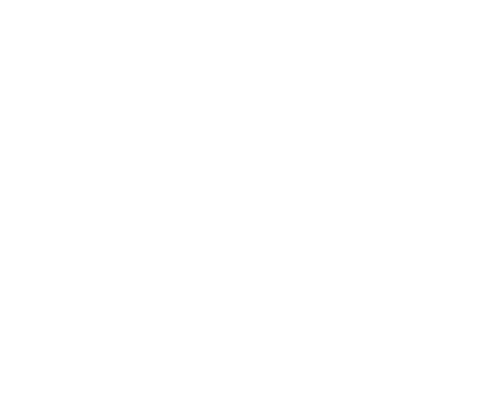

Saving figure MsPacman


In [8]:
img = env.render(mode='rgb_array')
plt.figure(figsize=(5, 4))
plt.imshow(img)
plt.axis('off')
save_fig('MsPacman')
plt.show();

In [9]:
# to verify if the image is the same as the observation
(img == obs).all()

True

In [10]:
# helper function to create an environment
def plot_environment(env, figsize=(5, 4)):
    plt.close() # or else nbagg sometimes plots in the previous cell
    plt.figure(figsize=figsize)
    img  = env.render(mode='rgb_array')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [11]:
# find the action space for the environment
env.action_space

Discrete(9)

In [12]:
env.reset()
for step in range(110):
    env.step(3)
for step in range(40):
    env.step(8)

<IPython.core.display.Javascript object>


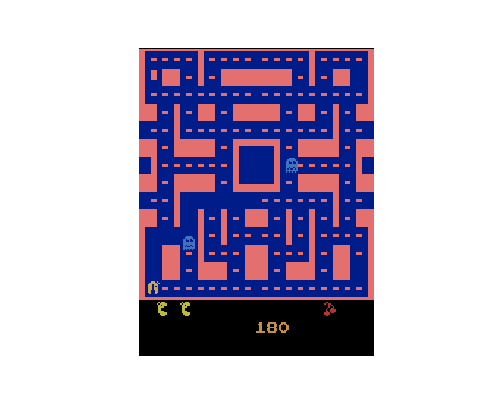

In [13]:
plot_environment(env)

In [17]:
obs, reward, done, info = env.step(0)

In [18]:
obs.shape

(210, 160, 3)

In [19]:
reward

0.0

In [20]:
done

False

In [21]:
info

{'ale.lives': 3}

In [22]:
# info is an environment-specific dictionary that can provide 
# some extra information about the internal state of the 
# environment. This is useful for debugging, but your 
# agent should not use this information for learning
# (it would be cheating)

In [23]:
# play one full game by moving in random directions for 10 steps at a time
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = env.render('rgb_array')
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample() # play randomly
    obs, reward, done, info = env.step(action)
    if done:
        break

In [24]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch

def plot_animation(frames, repeat=False, interval=40):
    plt.close()
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

<IPython.core.display.Javascript object>


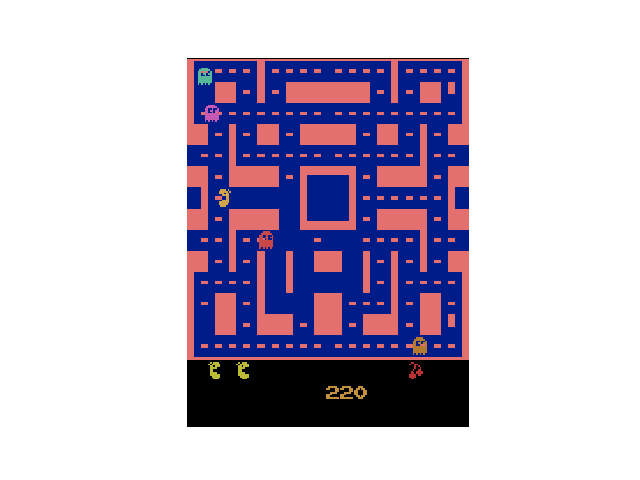

In [25]:
video = plot_animation(frames)
plt.show()

In [27]:
env.close()

In [28]:
# starting with a simpler environment
env = gym.make('CartPole-v0')
obs = env.reset()
obs

[2018-01-24 20:05:51,922] Making new env: CartPole-v0


array([ 0.01365852,  0.04136221,  0.01946554, -0.01801369])

In [29]:
# the four parameters in the observation array are:
# 0: the cart's horizontal position
# 1: its velocity
# 2: the angle of the pole
# 3: the angular velocity

In [30]:
# some environments open up in a separate window even when the rgb_array mode is specified
# helper function to run the environment in jupyter itself
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True
except Exception:
    openai_cart_pole_rendering = False
    
def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        return env.render(mode='rgb_array')
    else:
        img_w = 600
        img_h = 500
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000
        pole_col = 0x669acc
        
        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col)
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col,  width=pole_w)
        return np.array(img)
    
def plot_cart_pole(env, obs):
    plt.close()
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

<IPython.core.display.Javascript object>


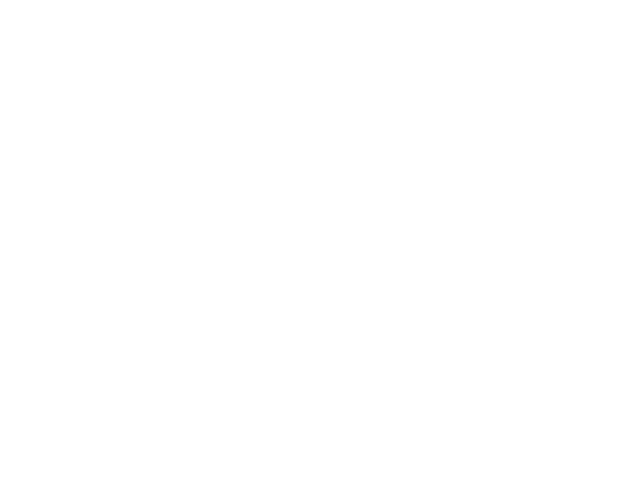

In [31]:
plot_cart_pole(env, obs)

In [32]:
# action space
env.action_space

Discrete(2)

In [33]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(0)
    if done:
        break

In [34]:
plt.close()

<IPython.core.display.Javascript object>


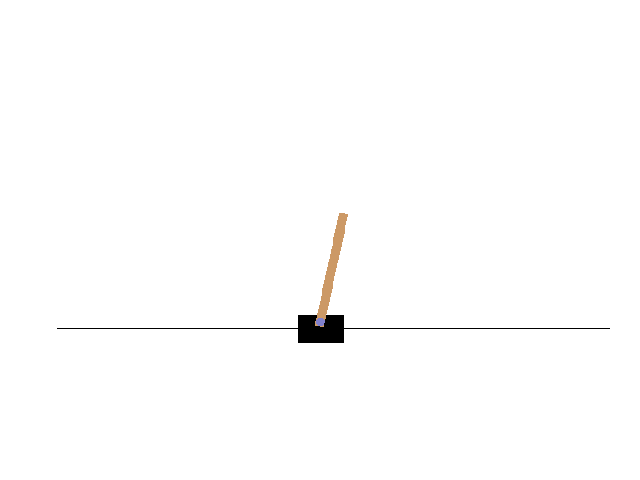

Saving figure cart_pole_plot


In [35]:
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis('off')
save_fig('cart_pole_plot')

In [36]:
img.shape

(400, 600, 3)

In [37]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(1)
    if done:
        break

<IPython.core.display.Javascript object>


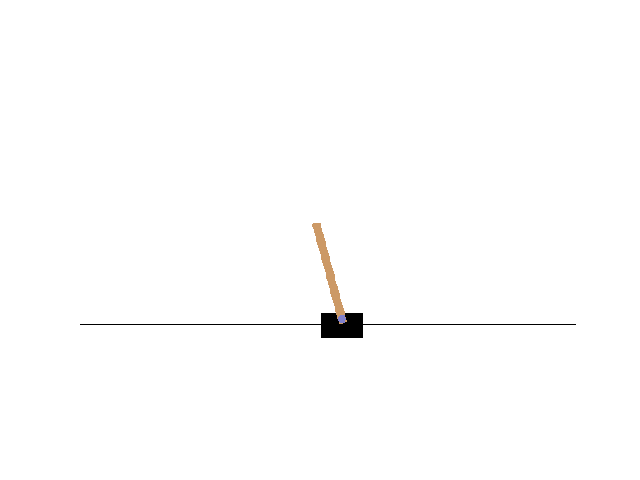

In [38]:
plot_cart_pole(env, obs)

In [39]:
# testing a simple hard-coded policy
frames = []
n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = render_cart_pole(env, obs)
    frames.append(img)
    
    # hard-coded policy
    position, velocity, angle, angular_velocity = obs
    if angle < 0:
        action = 0
    else:
        action = 1
    
    obs, reward, done, info = env.step(action)
    if done:
        break

<IPython.core.display.Javascript object>


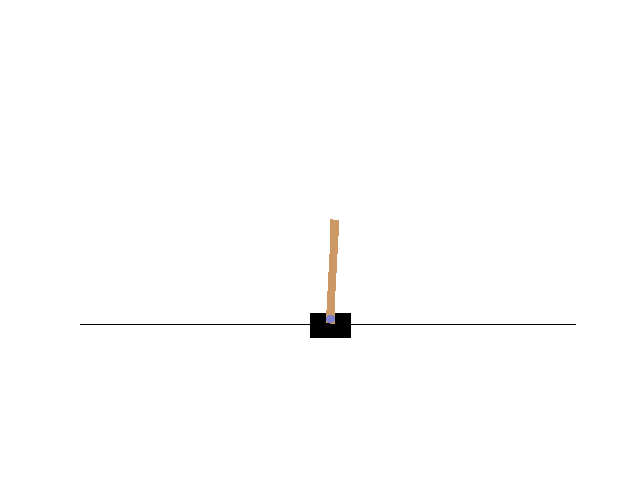

In [40]:
video = plot_animation(frames)
plt.show()

In [41]:
# Neural network policy
import tensorflow as tf

n_inputs = 4 # env.observation_space.shape
n_hidden = 4
n_outputs = 1
initializer = tf.contrib.layers.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, kernel_initializer=initializer)
outputs = tf.layers.dense(hidden, n_outputs, activation=tf.nn.sigmoid, kernel_initializer=initializer)

p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

init = tf.global_variables_initializer()

In [43]:
# randomly initialize this neural netowrk and use it to play a game
n_max_steps = 1000
frames = []

with tf.Session() as sess:
    init.run()
    obs = env.reset()
    for step in range(n_max_steps):
        img = render_cart_pole(env, obs)
        frames.append(img)
        action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
        obs, reward, done, info = env.step(action_val[0][0])
        if done:
            break
            
env.close()

<IPython.core.display.Javascript object>


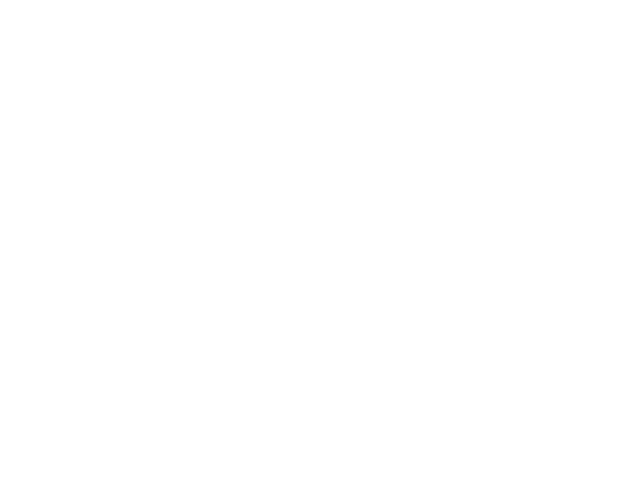

In [44]:
video = plot_animation(frames)
plt.show()

In [45]:
import tensorflow as tf

reset_graph()

n_inputs = 4
n_hidden = 4
n_outputs = 1
learning_rate = 0.01

initializer = tf.contrib.layers.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
y = tf.placeholder(tf.float32, shape=[None, n_outputs])

hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits) # probability of action 0 (left)
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cross_entropy)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [46]:
# play 10 different environments in parallel and train for 1000 iterations
n_environments = 10
n_iterations = 1000

envs = [gym.make('CartPole-v0') for _ in range(n_environments)]
observations = [env.reset() for env in envs]

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        target_probas = np.array([([1.] if obs[2] < 0 else [0.]) for obs in observations]) # if angle < 0 we want proba(left)=1., or else proba(left)=0.
        action_val, _ = sess.run([action, training_op], feed_dict={X: np.array(observations), y: target_probas})
        for env_index, env in enumerate(envs):
            obs, reward, done, info = env.step(action_val[env_index][0])
            observations[env_index] = obs if not done else env.reset()
    saver.save(sess, './my_policy_net_basic.ckpt')
        
for env in envs:
    env.close()

[2018-01-24 20:08:04,149] Making new env: CartPole-v0
[2018-01-24 20:08:04,165] Making new env: CartPole-v0
[2018-01-24 20:08:04,180] Making new env: CartPole-v0
[2018-01-24 20:08:04,184] Making new env: CartPole-v0
[2018-01-24 20:08:04,188] Making new env: CartPole-v0
[2018-01-24 20:08:04,196] Making new env: CartPole-v0
[2018-01-24 20:08:04,200] Making new env: CartPole-v0
[2018-01-24 20:08:04,206] Making new env: CartPole-v0
[2018-01-24 20:08:04,210] Making new env: CartPole-v0
[2018-01-24 20:08:04,213] Making new env: CartPole-v0


In [47]:
def render_policy_net(model_path, action, X, n_max_steps=1000):
    frames = []
    env = gym.make('CartPole-v0')
    obs = env.reset()
    with tf.Session() as sess:
        saver.restore(sess, model_path)
        for step in range(n_max_steps):
            img = render_cart_pole(env, obs)
            frames.append(img)
            action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
            obs, reward, done, info = env.step(action_val[0][0])
            if done:
                break
    env.close()
    return frames

[2018-01-24 20:08:07,055] Making new env: CartPole-v0


INFO:tensorflow:Restoring parameters from ./my_policy_net_basic.ckpt


[2018-01-24 20:08:07,071] Restoring parameters from ./my_policy_net_basic.ckpt


<IPython.core.display.Javascript object>


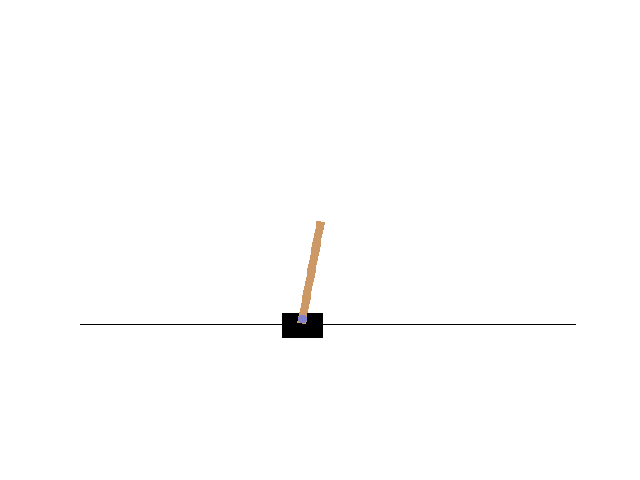

In [48]:
frames = render_policy_net('./my_policy_net_basic.ckpt', action, X)
video = plot_animation(frames)
plt.show()